In [1]:
import sys
import os

# Add the `src/` folder to the Python path
sys.path.append("..")
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
from src.config import ASSETS, RAW_DATA_PATH, PROCESSED_DATA_PATH, START_DATE, END_DATE
from src.data_loader import download_data, save_data, fetch_and_save_all
from src.preprocessing import preprocess_data
from src.forecast import generate_forecasts
from src.arima_model import train_arima, evaluate_arima
from src.lstm_model import train_lstm
from src.optimization import optimize_portfolio
from src.backtest import simulate_portfolio
from src.eda import plot_closing_prices, plot_returns_distribution, plot_rolling_volatility, run_eda, load_processed_data


2025-08-07 22:03:16.575986: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-08-07 22:03:16.592432: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1754593396.611986   93228 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1754593396.617804   93228 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1754593396.632625   93228 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

In [3]:

sns.set(style="whitegrid")


In [4]:
# ## 1. Fetch and Save Raw Data

print("[INFO] Fetching and saving raw data...")
fetch_and_save_all()


[INFO] Fetching and saving raw data...


[*********************100%***********************]  1 of 1 completed


[INFO] Saved data for TSLA to ../data/raw/


[*********************100%***********************]  1 of 1 completed


[INFO] Saved data for SPY to ../data/raw/


[*********************100%***********************]  1 of 1 completed


[INFO] Saved data for BND to ../data/raw/


[*********************100%***********************]  1 of 1 completed

[INFO] Saved data for GLD to ../data/raw/


In [4]:
# ## 2. Preprocess Raw Data to Cleaned Data

print("[INFO] Preprocessing data...")
for ticker in ASSETS:
    raw_file = os.path.join(RAW_DATA_PATH, f"{ticker}.csv")
    df_raw = pd.read_csv(raw_file)
    df_processed = preprocess_data(df_raw)
    processed_path = os.path.join(PROCESSED_DATA_PATH, f"{ticker}_processed.csv")
    os.makedirs(PROCESSED_DATA_PATH, exist_ok=True)
    df_processed.to_csv(processed_path, index=False)
    print(f"[INFO] Preprocessed data saved: {processed_path}")


[INFO] Preprocessing data...
[INFO] Preprocessed data saved: ../data/processed/TSLA_processed.csv
[INFO] Preprocessed data saved: ../data/processed/SPY_processed.csv
[INFO] Preprocessed data saved: ../data/processed/BND_processed.csv
[INFO] Preprocessed data saved: ../data/processed/GLD_processed.csv


EDA for TSLA:


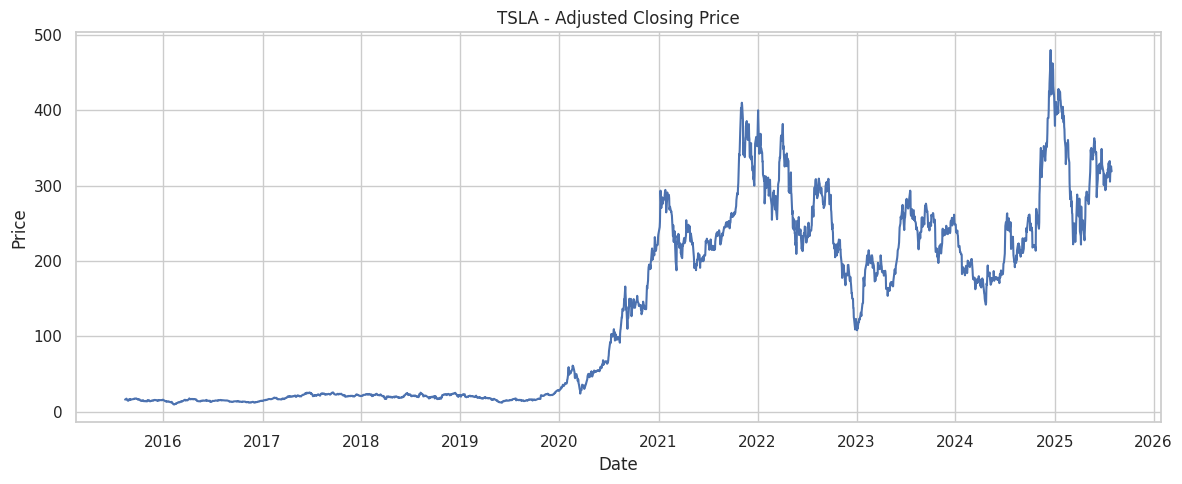

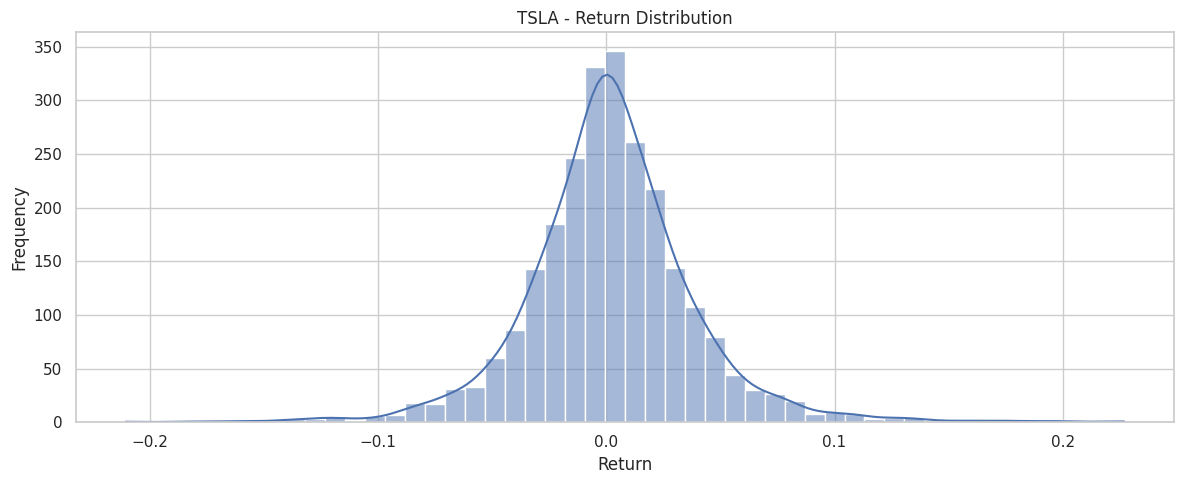

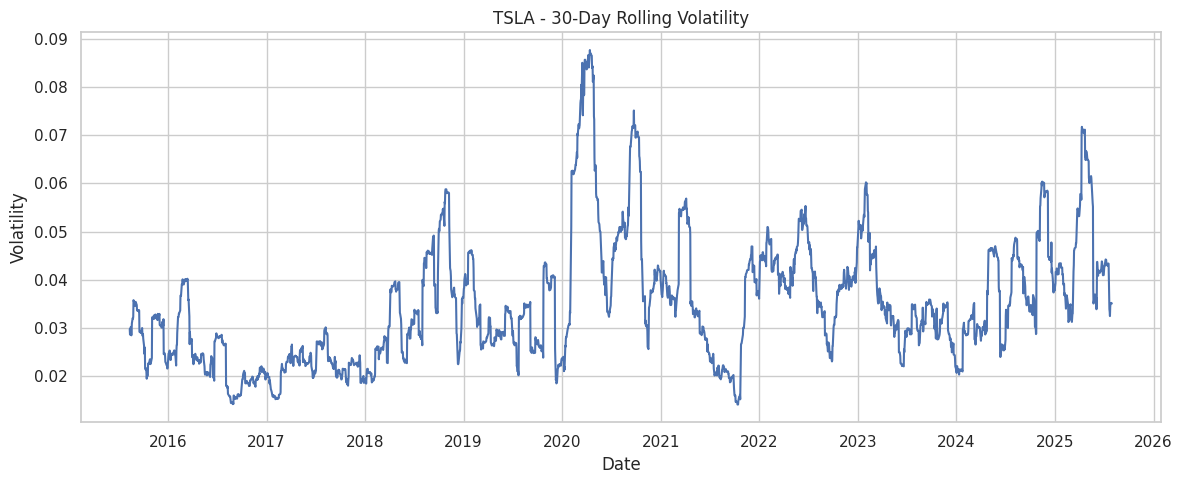

EDA for SPY:


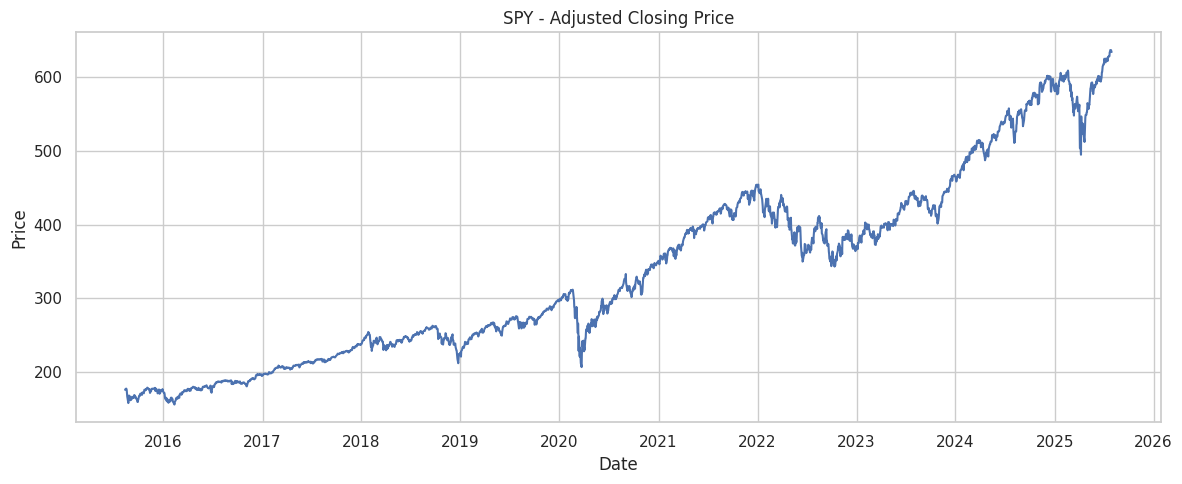

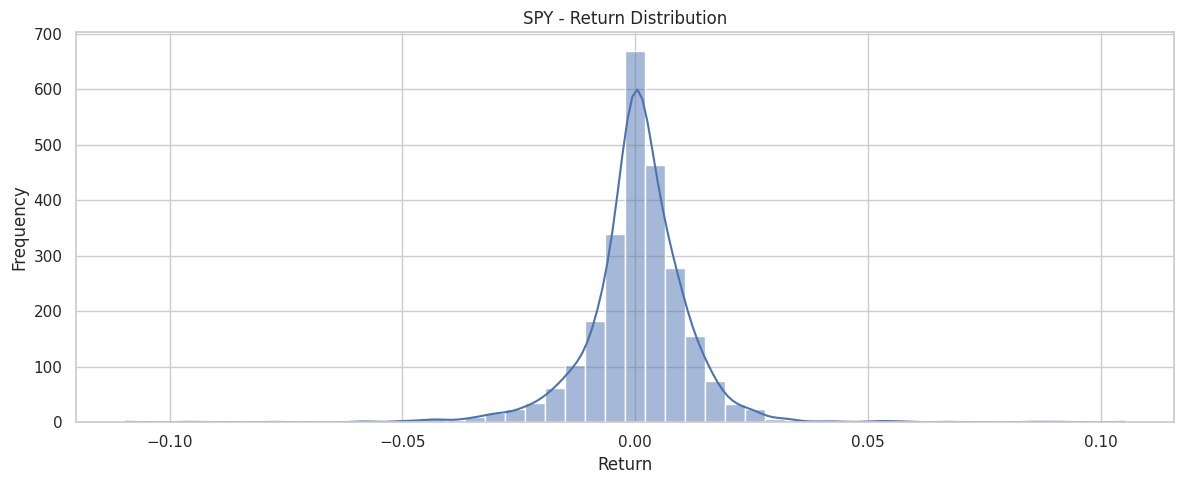

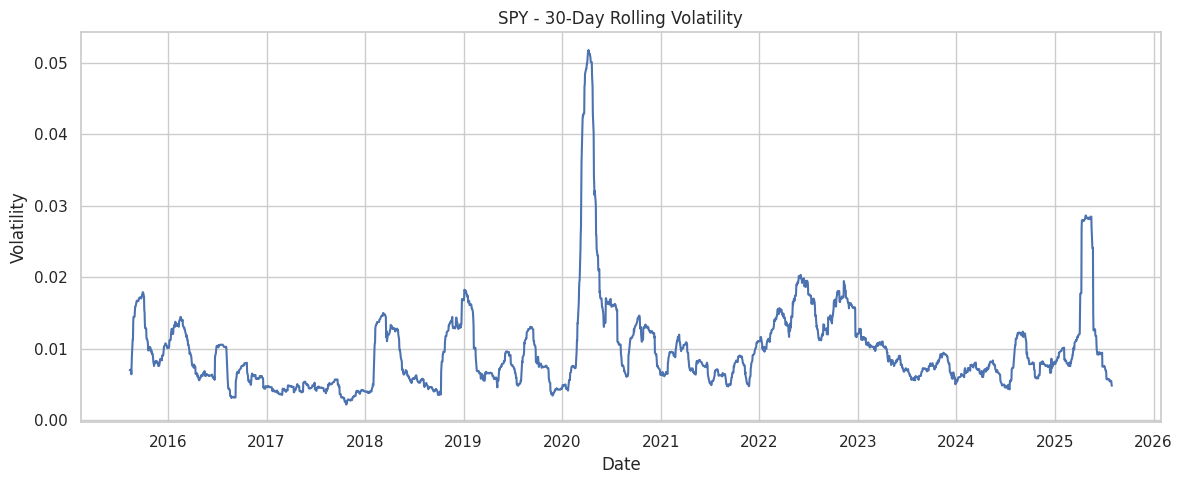

EDA for BND:


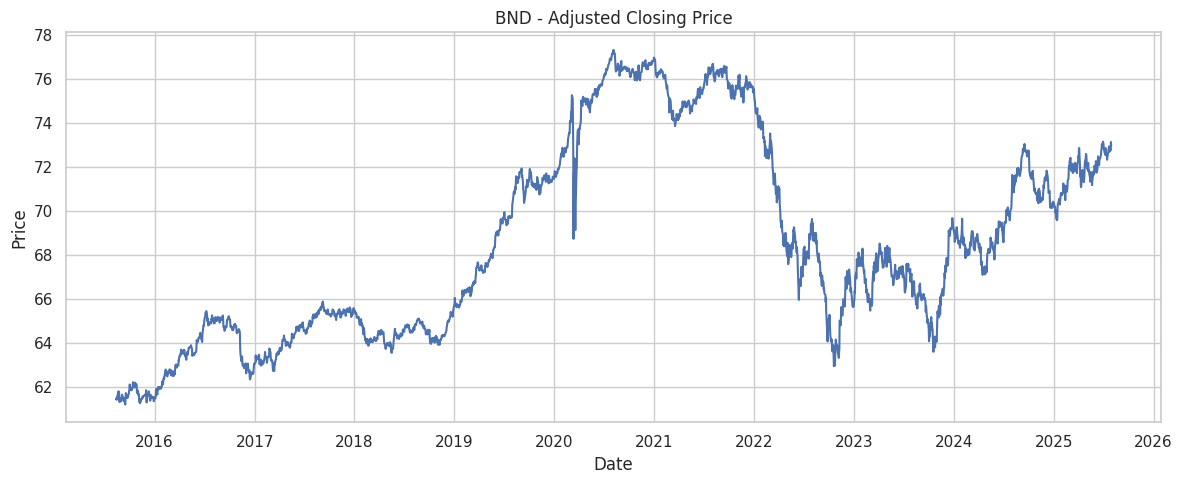

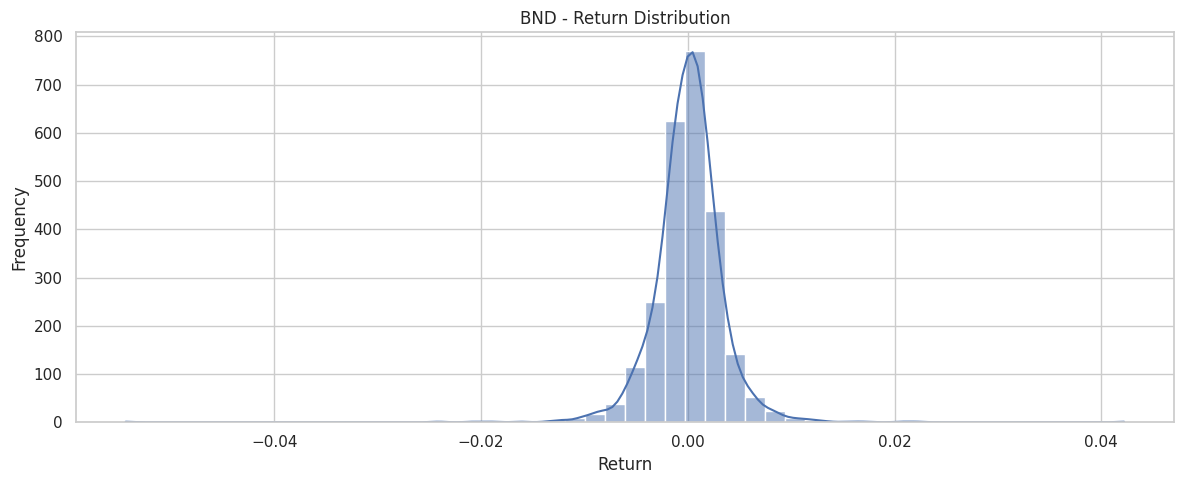

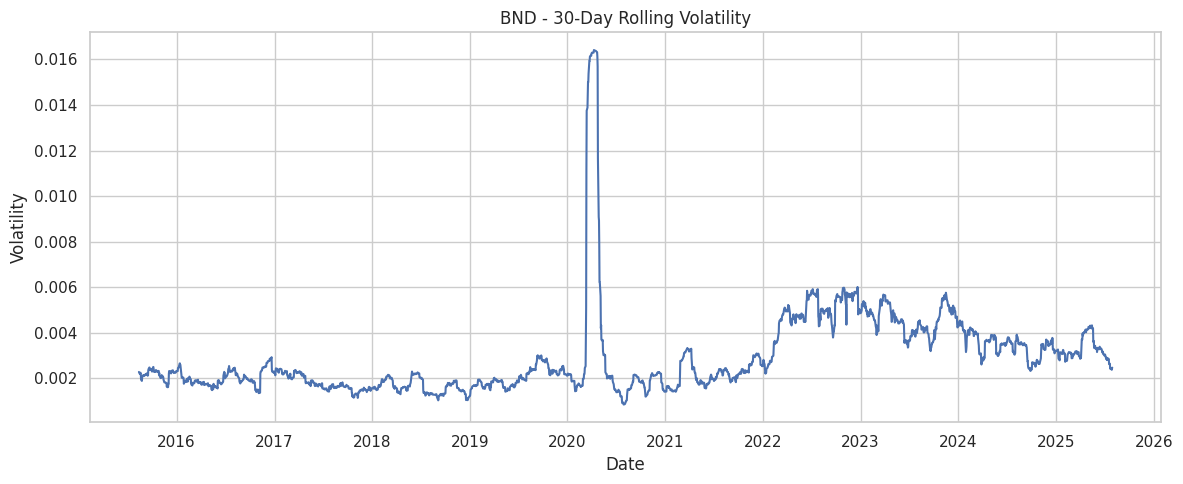

EDA for GLD:


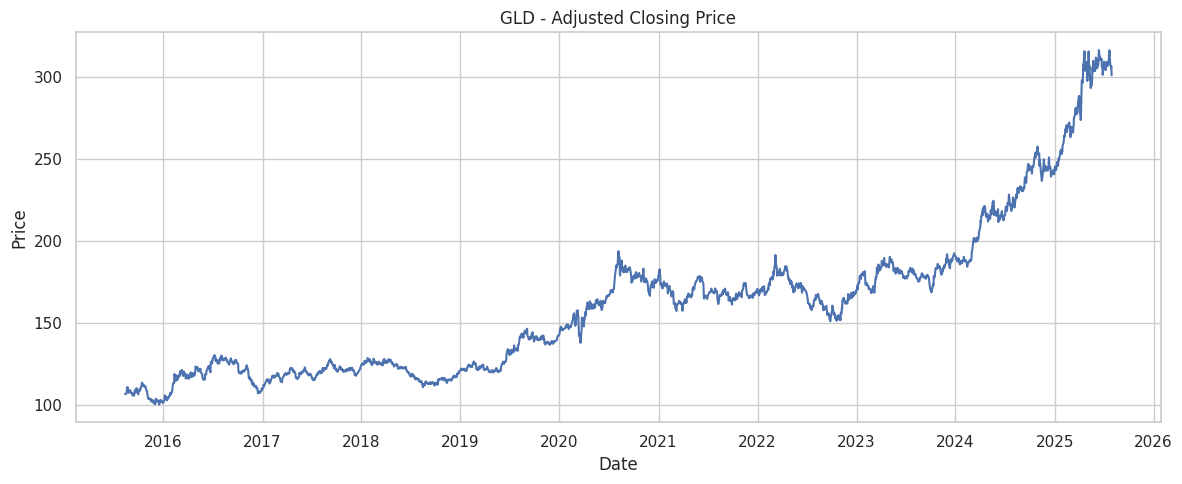

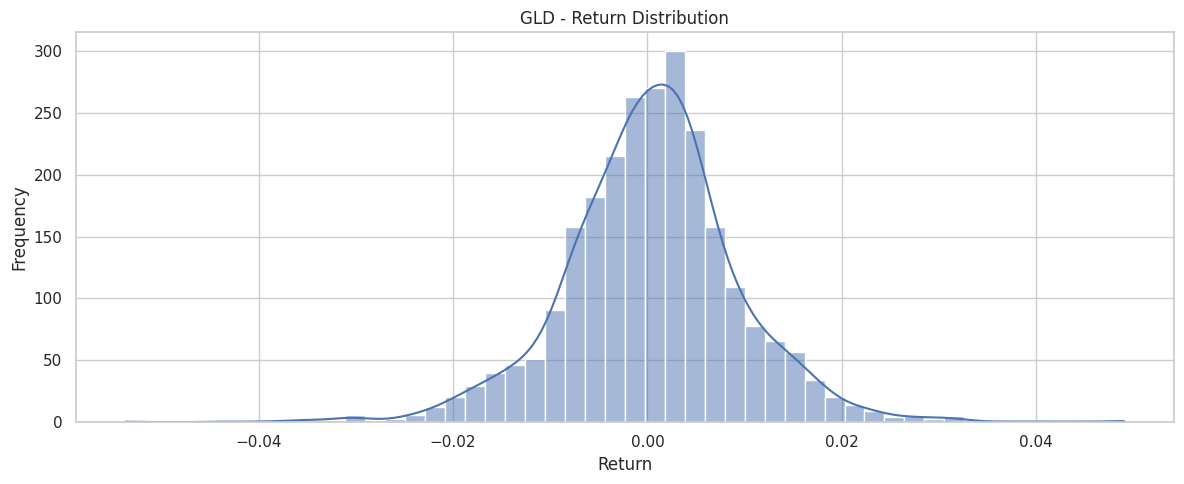

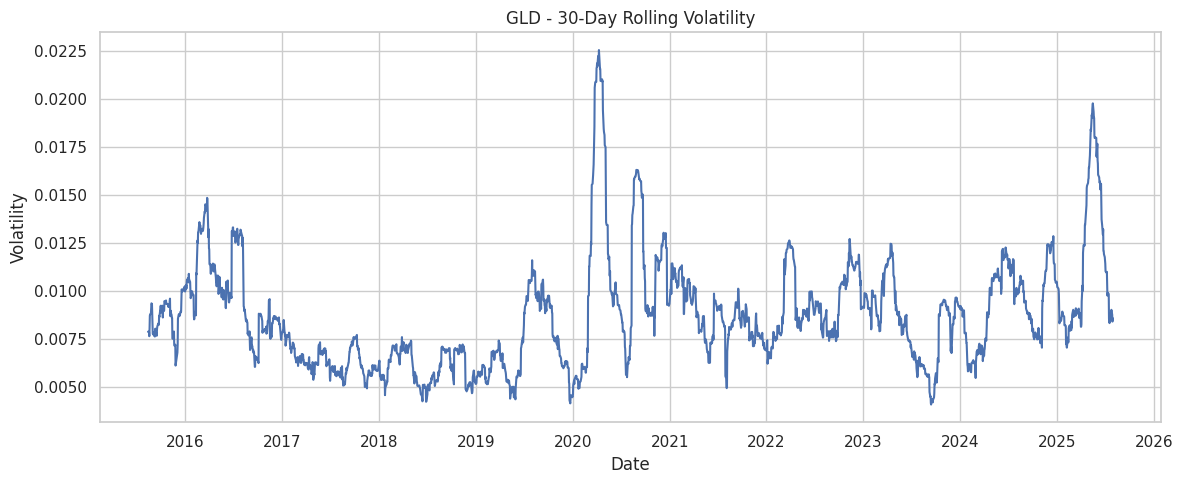

In [4]:
# ## 3. Exploratory Data Analysis (EDA)

# Loop through assets and plot manually
for ticker in ASSETS:
    print(f"EDA for {ticker}:")
    df = load_processed_data(ticker)
    plot_closing_prices(df, ticker)
    plot_returns_distribution(df, ticker)
    plot_rolling_volatility(df, ticker)


In [4]:
### 4. Forecasting with ARIMA and LSTM

forecast_days = 30
forecast_results = {}

for ticker in ASSETS:
    print(f"[INFO] Forecasting {ticker} for next {forecast_days} days...")
    forecast_df = generate_forecasts(ticker, days_ahead=forecast_days)
    forecast_results[ticker] = forecast_df
    display(forecast_df.head())


[INFO] Forecasting TSLA for next 30 days...
Loaded data for TSLA: 2535 rows
Training ARIMA model...
Training LSTM model...


W0000 00:00:1754592852.060030   77709 gpu_device.cc:2341] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━

,Forecast_ARIMA,Forecast_LSTM
Date,,
2025-07-31,319.040009,320.186218
2025-08-01,319.040009,319.678162
2025-08-04,319.040009,319.071808
2025-08-05,319.040009,318.399475
2025-08-06,319.040009,317.663116


[INFO] Forecasting SPY for next 30 days...
Loaded data for SPY: 2535 rows
Training ARIMA model...
Training LSTM model...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 

,Forecast_ARIMA,Forecast_LSTM
Date,,
2025-07-31,634.166439,629.645691
2025-08-01,634.902934,627.953613
2025-08-04,634.530898,625.774231
2025-08-05,635.192123,623.300903
2025-08-06,635.019999,620.607239


[INFO] Forecasting BND for next 30 days...
Loaded data for BND: 2535 rows
Training ARIMA model...
Training LSTM model...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 

,Forecast_ARIMA,Forecast_LSTM
Date,,
2025-07-31,72.920999,73.073982
2025-08-01,72.931631,73.120575
2025-08-04,72.957083,73.164726
2025-08-05,72.959533,73.205849
2025-08-06,72.940810,73.243683


[INFO] Forecasting GLD for next 30 days...
Loaded data for GLD: 2535 rows
Training ARIMA model...
Training LSTM model...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 

,Forecast_ARIMA,Forecast_LSTM
Date,,
2025-07-31,298.380892,309.118622
2025-08-01,296.086594,309.379425
2025-08-04,293.612988,309.519287
2025-08-05,291.417875,309.621338
2025-08-06,289.118049,309.768311


In [4]:
# ## 5. Train Models (Optional if training separately)

tickers = ["TSLA", "SPY", "BND", "GLD"]

arima_models = {}
lstm_models = {}

for ticker in tickers:
    print(f"\nTraining models for {ticker}...")
    df = load_processed_data(ticker)
    series = df["Adj Close"]

    # ARIMA Training
    arima_model, arima_rmse = train_arima(series)
    arima_models[ticker] = arima_model
    print(f"{ticker} ARIMA RMSE: {arima_rmse:.2f}")

    # LSTM Training
    lstm_model, scaler, X, y = train_lstm(series)
    lstm_models[ticker] = {
        "model": lstm_model,
        "scaler": scaler,
        "X": X,
        "y": y
    }
    print(f"{ticker} LSTM model trained.")



Training models for TSLA...
TSLA ARIMA RMSE: 69.85
Epoch 1/20


W0000 00:00:1754593446.725704   93228 gpu_device.cc:2341] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


77/77 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.0237
Epoch 2/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0015
Epoch 3/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0013
Epoch 4/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0011
Epoch 5/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 9.8610e-04
Epoch 6/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 9.2220e-04
Epoch 7/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 8.9248e-04
Epoch 8/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 7.9326e-04
Epoch 9/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 7.6112e-04
Epoch 10/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 6.9912e-04
Epoch 11/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 6.6270e-04
Epoch 12/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 6.5097e-04
Epoch 13/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 6.4174e-04
Epoch 14/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 5.9736e-04
Epoch 15/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 

In [6]:
import joblib
assets = ["TSLA", "SPY", "BND", "GLD"]

for asset in assets:
    data = load_processed_data(asset)["Adj Close"]
    
    # Train ARIMA
    joblib.dump(arima_model, f"../models/arima_{asset}.pkl")

    # Train LSTM
    lstm_model.save(f"../models/lstm_{asset}.h5")
    joblib.dump(scaler, f"../models/lstm_scaler_{asset}.pkl")


In [9]:
# ## 6. Portfolio Optimization

# Prepare historical price data dictionary
price_dfs = {}
for ticker in ASSETS:
    df = load_processed_data(ticker)
    price_dfs[ticker] = df

print("[INFO] Optimizing portfolio weights...")
weights_dict, (exp_return, volatility, sharpe) = optimize_portfolio(price_dfs)

print("Optimal portfolio weights:")
for ticker, weight in weights_dict.items():
    print(f"{ticker}: {weight:.4f}")

print(f"\n[INFO] Portfolio Performance Metrics:")
print(f"Expected Return: {exp_return:.4f}")
print(f"Volatility: {volatility:.4f}")
print(f"Sharpe Ratio: {sharpe:.4f}")



[INFO] Optimizing portfolio weights...
Expected annual return: 13.3%
Annual volatility: 12.4%
Sharpe Ratio: 1.07
Optimal portfolio weights:
TSLA: 0.0553
SPY: 0.3661
BND: 0.0000
GLD: 0.5786

[INFO] Portfolio Performance Metrics:
Expected Return: 0.1334
Volatility: 0.1241
Sharpe Ratio: 1.0742


In [12]:
import pandas as pd

# Save weights to CSV
weights_df = pd.DataFrame.from_dict(weights_dict, orient='index', columns=['Weight'])
weights_df.to_csv('../data/weights/optimal_weights.csv')

# Save portfolio metrics
metrics = {
    "Expected Return": exp_return,
    "Volatility": volatility,
    "Sharpe Ratio": sharpe
}
metrics_df = pd.DataFrame(metrics.items(), columns=['Metric', 'Value'])
metrics_df.to_csv('../data/weights/portfolio_metrics.csv', index=False)

print("[INFO] Saved optimal weights and metrics to CSV.")


[INFO] Saved optimal weights and metrics to CSV.


[INFO] Running backtest from 2015-07-01 to 2025-07-31...


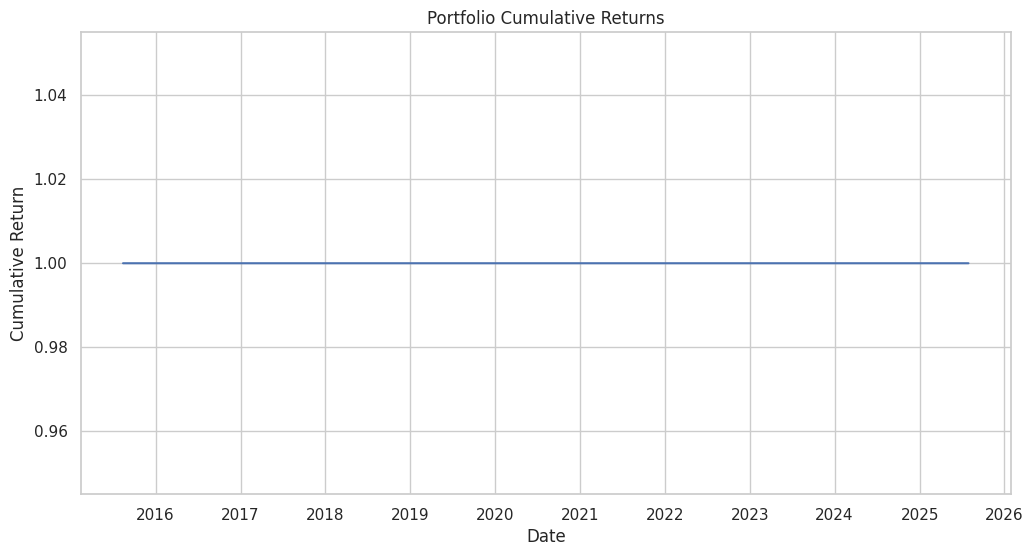

In [ ]:
# ## 7. Backtesting Portfolio Strategy

# ✅ Unpack weights and portfolio stats correctly
weights, (port_return, port_volatility, port_sharpe) = optimize_portfolio(price_dfs)

start_backtest = START_DATE
end_backtest = END_DATE

print(f"[INFO] Running backtest from {start_backtest} to {end_backtest}...")
cumulative_returns = simulate_portfolio(price_dfs, weights, start_backtest, end_backtest)

#  Plot cumulative returns
plt.figure(figsize=(12, 6))
plt.plot(cumulative_returns.index, cumulative_returns.values)
plt.title("Portfolio Cumulative Returns")
plt.xlabel("Date")
plt.ylabel("Cumulative Return")
plt.grid(True)
plt.tight_layout()
plt.show()

#  Print and save weights to CSV
import pandas as pd

weights_df = pd.DataFrame(list(weights.items()), columns=["Asset", "Weight"])
weights_df.to_csv("../data/cumulative/portfolio_weights.csv", index=False)
print("\n[INFO] Portfolio Weights:")
print(weights_df)

#  Save cumulative returns to CSV
cumulative_returns_df = cumulative_returns.reset_index()
cumulative_returns_df.columns = ["Date", "Cumulative_Return"]
cumulative_returns_df.to_csv("../data/cumulative/portfolio_cumulative_returns.csv", index=False)

#  Print portfolio stats
print(f"\n[INFO] Portfolio Performance:")
print(f"Expected Return: {port_return:.2%}")
print(f"Volatility: {port_volatility:.2%}")
print(f"Sharpe Ratio: {port_sharpe:.3f}")
